In [13]:
import pandas as pd

In [14]:
# Load dataset
df = pd.read_csv(r"C:\Users\ASUS\Downloads\UK_Air_Quality_Sample_Data.csv")
df.head()


,Date,City,PM2.5 (µg/m³),NO2 (µg/m³),Temperature (°C),Humidity (%)
0,2023-01-01,London,29.5,56.6,2.6,65
1,2023-01-01,Manchester,24.8,35.7,6.6,64
2,2023-01-02,London,24.3,28.8,7.8,85
3,2023-01-02,Manchester,28.4,38.1,8.0,71
4,2023-01-03,London,29.8,20.4,4.4,66


In [15]:
#basic information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              20 non-null     object 
 1   City              20 non-null     object 
 2   PM2.5 (µg/m³)     20 non-null     float64
 3   NO2 (µg/m³)       20 non-null     float64
 4   Temperature (°C)  20 non-null     float64
 5   Humidity (%)      20 non-null     int64  
dtypes: float64(3), int64(1), object(2)
memory usage: 1.1+ KB


In [16]:
#check missing values
df.isnull().sum()

Date                0
City                0
PM2.5 (µg/m³)       0
NO2 (µg/m³)         0
Temperature (°C)    0
Humidity (%)        0
dtype: int64

In [17]:
#descriptive statistics
df.describe()

,PM2.5 (µg/m³),NO2 (µg/m³),Temperature (°C),Humidity (%)
count,20.00000,20.000000,20.000000,20.000000
mean,18.55500,35.730000,7.830000,75.000000
std,7.82906,12.437638,4.558982,9.420023
min,5.60000,20.400000,0.100000,60.000000
25%,11.65000,24.900000,4.175000,66.000000
50%,21.05000,36.000000,7.900000,72.500000
75%,24.30000,42.725000,11.950000,83.500000
max,29.80000,59.300000,15.000000,89.000000


In [18]:
# Convert 'Date' to datetime format
df['Date'] = pd.to_datetime(df['Date'])

In [19]:
# Group by City and calculate mean pollutant levels
city_pollutant_means = df.groupby("City")[["PM2.5 (µg/m³)", "NO2 (µg/m³)"]].mean()
print(city_pollutant_means)

            PM2.5 (µg/m³)  NO2 (µg/m³)
City                                  
London              19.25        36.90
Manchester          17.86        34.56


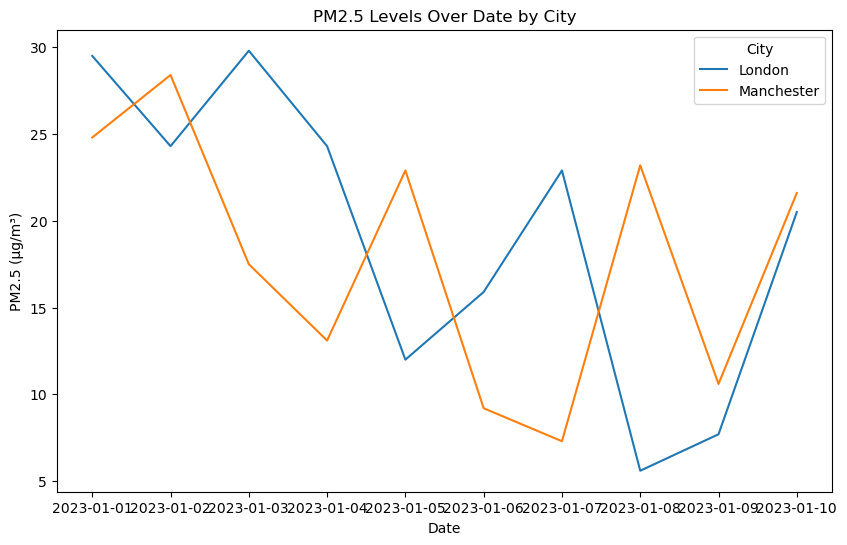

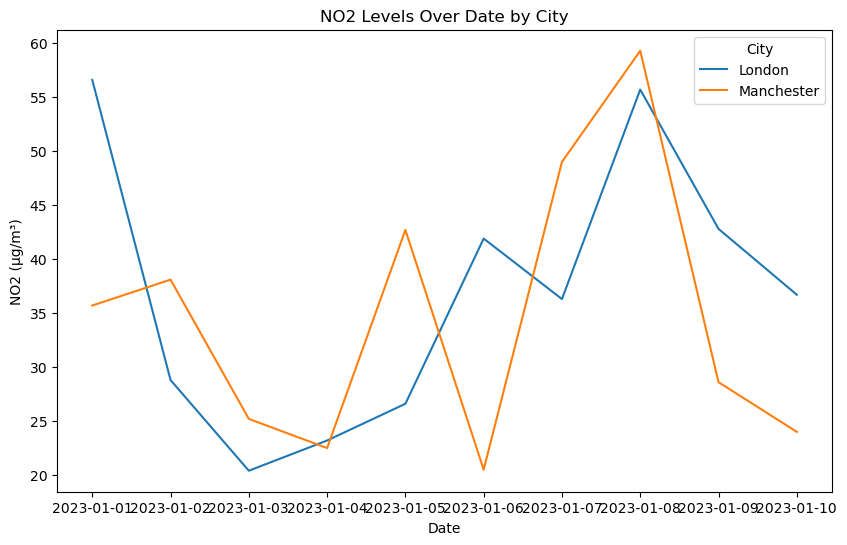

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Line plot of PM2.5 levels over time for each city
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x="Date", y="PM2.5 (µg/m³)", hue="City")
plt.title("PM2.5 Levels Over Date by City")
plt.show()

# Line plot of NO2 levels over time for each city
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x="Date", y="NO2 (µg/m³)", hue="City")
plt.title("NO2 Levels Over Date by City")
plt.show()

Objective: Compare average pollution levels (PM2.5 and NO2) between London and Manchester.
*Both cities show a fluctuating pattern in PM2.5 levels over the 10 days, with levels varying significantly from one day to another.
*London generally has higher PM2.5 levels than Manchester at the beginning of the period.
*However, towards the end, both cities exhibit similar PM2.5 levels, with Manchester occasionally surpassing London.
--> Decreasing Trends:--There's an overall downward trend in PM2.5 levels from the start to around the middle of the period (days 1 to 6).
--After reaching lower levels, both cities experience increases and fluctuations in PM2.5 from day 7 onward.
*The highest PM2.5 level recorded appears in London around the start of the period.
*The lowest levels for both cities are observed around day 7–8, with both cities dropping close to 5 µg/m³.

           PM2.5 (µg/m³)  NO2 (µg/m³)
Day                                  
Friday            12.550       31.200
Monday            17.750       34.575
Saturday          15.100       42.650
Sunday            20.775       51.825
Thursday          17.450       34.650
Tuesday           22.350       26.575
Wednesday         18.700       22.850


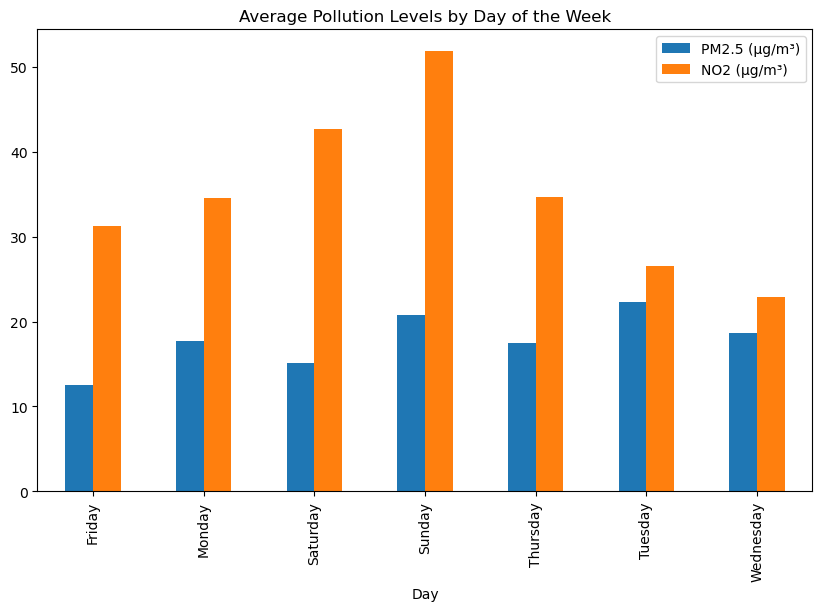

In [21]:
# Extract day of the week and month for trend analysis
df['Day'] = df['Date'].dt.day_name()
df['Month'] = df['Date'].dt.month_name()

# Average pollution levels by day of the week
day_means = df.groupby("Day")[["PM2.5 (µg/m³)", "NO2 (µg/m³)"]].mean()
print(day_means)

# Plot daily averages for PM2.5 and NO2
day_means.plot(kind='bar', figsize=(10, 6), title="Average Pollution Levels by Day of the Week")
plt.show()

This bar chart shows the average pollution levels for PM2.5 (in blue) and NO2 (in orange) for each day of the week. Here’s an analysis based on the observed trends:
    *Sunday shows the highest levels for both PM2.5 and NO2. This could be due to factors such as increased indoor heating, recreational activities, or other events leading to higher emissions on weekends.
    *PM2.5 and NO2 levels tend to be lower on weekdays (e.g., Monday, Tuesday, Wednesday) and higher on weekends (Saturday and Sunday).
    *Friday shows moderate levels, possibly indicating a gradual increase towards the weekend.
    *Across all days, NO2 levels are significantly higher than PM2.5 levels, suggesting that NO2 emissions (often associated with traffic or industrial activities) are a dominant pollutant in this dataset.
    *There’s a noticeable dip in both pollutants on Wednesday and Tuesday, which may suggest reduced activity or emissions during the middle of the workweek.
    
    --> Traffic Patterns:

          The increase in pollution levels over the weekend could relate to increased recreational travel or higher usage of vehicles.

    -->Industrial and Commercial Activity:

          Weekday NO2 levels may be driven by consistent commuter traffic, while the PM2.5 levels remain relatively low and steady, possibly due to less residential heating or fewer activities that generate PM2.5.
    
    -->Other Emission Sources:

        The spike on Sunday could indicate other sources, such as residential heating or specific events, that cause a temporary increase in both pollutants.

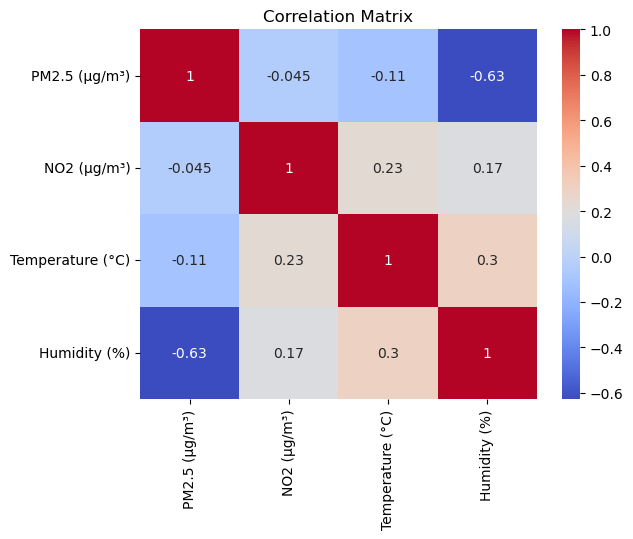

In [22]:
# Correlation matrix
correlations = df[["PM2.5 (µg/m³)", "NO2 (µg/m³)", "Temperature (°C)", "Humidity (%)"]].corr()
sns.heatmap(correlations, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

This correlation matrix shows the relationships between four variables: PM2.5, NO2, Temperature, and Humidity. Each value in the matrix represents the correlation coefficient between two variables, ranging from -1 (strong negative correlation) to +1 (strong positive correlation). Here’s an analysis based on the observed correlations:
        
 1. PM2.5 and Humidity:

   *There is a strong negative correlation between PM2.5 and Humidity (-0.63). This suggests that as humidity increases, PM2.5 levels tend to decrease.
   *This could be because higher humidity often accompanies rain or other weather conditions that help to "wash out" particulate matter from the air.

 2.NO2 and Temperature:

   *A moderate positive correlation exists between NO2 and Temperature (0.23). This indicates that NO2 levels tend to increase as temperature rises, though the correlation is not very strong.
   *This could be due to increased emissions from sources like vehicle exhaust, which can be higher during warmer periods due to more travel or certain chemical reactions in the atmosphere that increase NO2 concentrations in warmer conditions.

 3.Temperature and Humidity:

   *Temperature and Humidity show a moderate positive correlation (0.3). This is a common association, as warmer air can hold more moisture, leading to higher humidity levels.

 4.Weak or No Correlation between PM2.5 and NO2:

   *The correlation between PM2.5 and NO2 is very weak (-0.045), suggesting that these pollutants are influenced by different factors or sources and do not tend to increase or decrease together.
 5.Other Weak Correlations:

   *PM2.5 has a weak negative correlation with Temperature (-0.11), indicating only a minor tendency for PM2.5 to decrease slightly as temperature rises.
   *NO2 also has a weak positive correlation with Humidity (0.17), implying that NO2 levels might increase slightly with higher humidity, though this relationship is not strong.

--->Summary of Findings:
   *PM2.5 levels are highly influenced by Humidity, with higher humidity generally leading to lower PM2.5 levels.
   *NO2 levels have a moderate relationship with Temperature, suggesting that warmer temperatures might lead to slightly higher NO2 levels.
   *The weak or negligible correlation between PM2.5 and NO2 implies these pollutants may originate from different sources or respond differently to environmental factors.